In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dmap = np.load("../data/sealion/TrainDensity/872_2.npz")["dmap"]
d = np.sum(dmap, axis=-1)

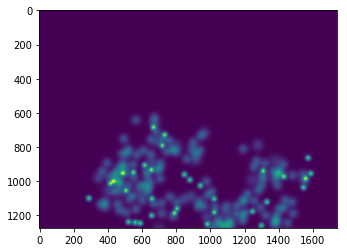

In [3]:
plt.imshow(d)

In [4]:
np.std(d)

0.00019151358

In [5]:
np.mean(d)

7.6299664e-05

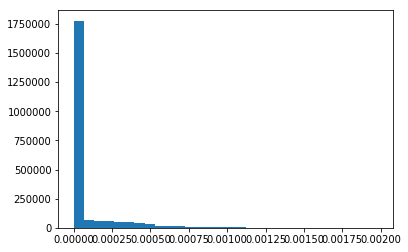

In [6]:
_ = plt.hist(d.ravel(), bins=30)

In [112]:
0.01/(224*224)

1.992984693877551e-07

In [113]:
g = np.log(d + 1e-9)

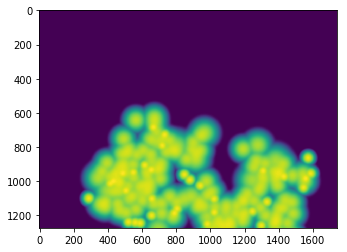

In [114]:
plt.imshow(g)

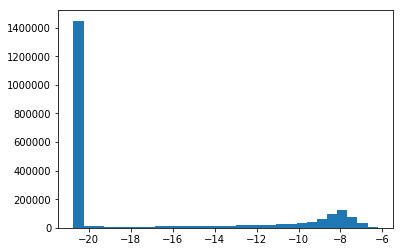

In [115]:
_ = plt.hist(g.ravel(), bins=30)

In [118]:
ma = np.max(g)
mi = np.min(g)
a = 1/(ma - mi)
b = -a * mi
ds = a * g + b

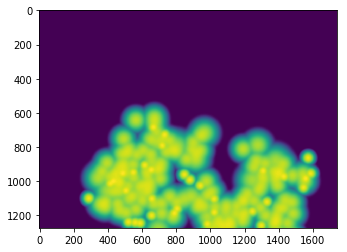

In [119]:
plt.imshow(ds)

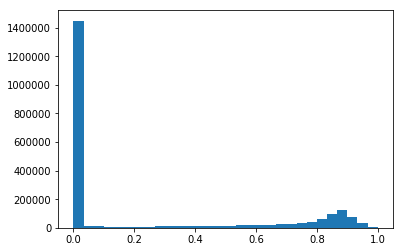

In [120]:
_ = plt.hist(ds.ravel(), bins=30)

In [10]:
dlog = np.log(ds+1e-9)

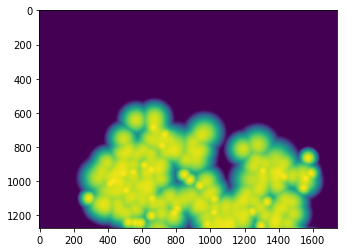

In [11]:
plt.imshow(dlog)

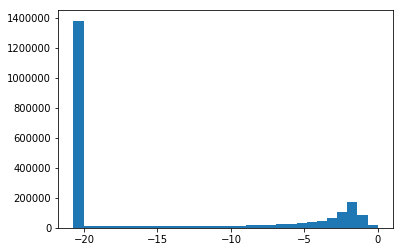

In [12]:
_ = plt.hist(dlog.ravel(), bins=30)

In [13]:
mu = np.mean(dlog)
s = np.std(dlog)
dc = (dlog - mu)/s

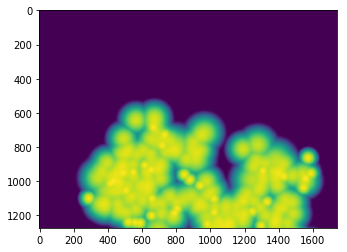

In [14]:
plt.imshow(dc)

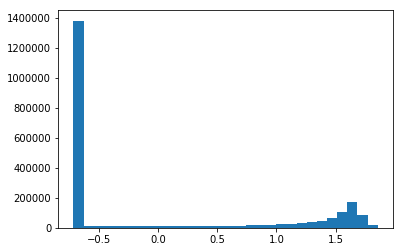

In [121]:
_ = plt.hist(dc.ravel(), bins=30)

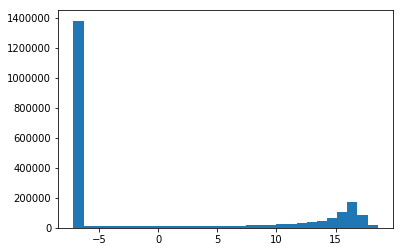

In [123]:
_ = plt.hist(dc.ravel() * 10, bins=30)

In [16]:
np.max(dc)

1.8580753

In [17]:
dc.shape

(1273, 1741)

In [18]:
dc.mean()

-1.5972793e-07

In [19]:
def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_pred - y_true), axis=-1)

In [41]:
dcc = dc.reshape((1, ) + dc.shape + (1,))

In [42]:
dcc.shape

(1, 1273, 1741, 1)

In [43]:
np.mean(mean_squared_error(dcc, dcc))

0.0

In [52]:
pred = np.ones(dcc.shape) * dcc.mean()
np.mean(mean_squared_error(dcc, pred))

1.000000259911022

In [46]:
pred = np.zeros(dcc.shape)

In [47]:
mean_squared_error(dcc, pred).shape

(1, 1273, 1741)

In [33]:
mean_squared_error(dc, pred)

array([ 0.51812176,  0.51812176,  0.51812176, ...,  1.28159304,
        1.26958752,  1.25775964])

In [48]:
def mean_squared_errorb(y_true, y_pred):
    return np.mean(np.mean(np.mean(np.square(y_pred - y_true), axis=-1), axis=-1), axis=-1)

In [49]:
mean_squared_errorb(dcc, pred)

array([ 1.00000026])

In [53]:
np.square(dcc - pred).shape

(1, 1273, 1741, 1)

In [54]:
db = dcc.reshape(1, 1273 * 1741)

In [55]:
predb = pred.reshape(1, 1273 * 1741)

In [57]:
mean_squared_error(db, predb)

array([ 1.00000026])

In [58]:
pred = np.zeros(dcc.shape)

In [64]:
pred[0, 10:, 10:, 0] = dcc[0, :-10, :-10, 0]

In [65]:
np.mean(mean_squared_error(dcc, pred))

0.019180140723789596

In [87]:
predb = pred * 1.01

In [88]:
np.mean(mean_squared_error(dcc, predb))

0.019338046691204789

In [89]:
np.sum(predb)

-529.42365746146424

In [90]:
np.sum(pred)

-524.1818390712142